In [10]:
import matplotlib.pyplot as plt
from modules.var_commons import *

In [13]:
mdata = pd.read_csv('../../data/monthly-time-series/full_data_weighted_senti_16.csv')
mdata = mdata.drop('year_month', axis=1)
mdata.columns

Index(['HDZ_senti', 'SDP_senti', 'MOZEMO_senti', 'DP_senti', 'MOST_senti',
       'HDZ', 'SDP', 'MOST', 'DP', 'MOZEMO', 'NEODLUCNI', 'INFLACIJA'],
      dtype='object')

In [14]:
# perform_adf_test(mdata)

In [15]:
mdata.tail()

,HDZ_senti,SDP_senti,MOZEMO_senti,DP_senti,MOST_senti,HDZ,SDP,MOST,DP,MOZEMO,NEODLUCNI,INFLACIJA
41,0.155235,0.021059,0.034898,0.064380,-0.031889,29.5,12.6,8.1,7.9,7.9,18.0,4.7
42,-0.175527,0.056169,0.022568,0.039117,-0.095286,28.2,12.9,7.5,8.4,6.8,19.7,4.5
43,0.131259,-0.026555,-0.016692,0.066009,-0.092564,29.1,13.5,6.7,7.6,6.6,18.6,4.1
44,-0.117057,0.019231,0.069398,0.037625,-0.012960,28.7,13.9,7.0,6.9,7.6,18.1,3.8
45,-0.128222,0.323860,0.179114,0.033047,0.029081,30.4,20.5,6.7,8.5,8.0,13.6,4.9


In [17]:
# find_optimal_model_params(mdata, max_order=4)

In [18]:
endogeneous_columns = ["HDZ", "SDP", "MOST", "DP", "MOZEMO", "NEODLUCNI"]
mse = perform_var_using_test_set(mdata=mdata, max_lags=3, test_set_size=4, endogeneous_columns=endogeneous_columns)
print(f'Total MSE: {mse}')

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 3, BIC -> 0, FPE -> 0, HQIC ->  0>
Using 3 based on aic criterion
Discarding 0 observations
MSE: 12.58094102747947
Actual values: [[30.4 20.5  6.7  8.5  8. ]]
Predicted values: [[26.94706787 14.18556852  7.02364196  5.47365376  9.35882456]]

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 3, BIC -> 0, FPE -> 0, HQIC ->  0>
Using 3 based on aic criterion
Discarding 1 observations
MSE: 1.2185735481574698
Actual values: [[28.7 13.9  7.   6.9  7.6]]
Predicted values: [[30.21816271 12.92628095  6.2667909   8.4016497   7.81765464]]

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 3, BIC -> 0, FPE -> 0, HQIC ->  0>
Using 3 based on aic criterion
Discarding 2 observations
MSE: 3.326119989963119
Actual values: [[29.1 13.5  6.7  7.6  6.6]]
Predicted values: [[26.20859416 12.29381847  7.87830664  9.51162784  5.2685456 ]]

<stats

C:\Users\Ana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packag

In [20]:
mdata = pd.read_csv('../../data/monthly-time-series/full_data_weighted_senti_16.csv')
mdata = mdata.drop('year_month', axis=1)

mse, df_forecast, actual, predicted = perform_var_analysis(mdata, max_lags=3, test_size=1, endogeneous_columns=endogeneous_columns)
print(f'MSE: {mse}')
print(f'Actual: {actual}')
print(f'Predicted: {predicted}')

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 3, BIC -> 0, FPE -> 0, HQIC ->  0>
Using 3 based on aic criterion
MSE: 12.58094102747947
Actual:      HDZ   SDP  MOST   DP  MOZEMO
45  30.4  20.5   6.7  8.5     8.0
Predicted:     HDZforecast  SDPforecast  MOSTforecast  DPforecast  MOZEMOforecast
45    26.947068    14.185569      7.023642    5.473654        9.358825


C:\Users\Ana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


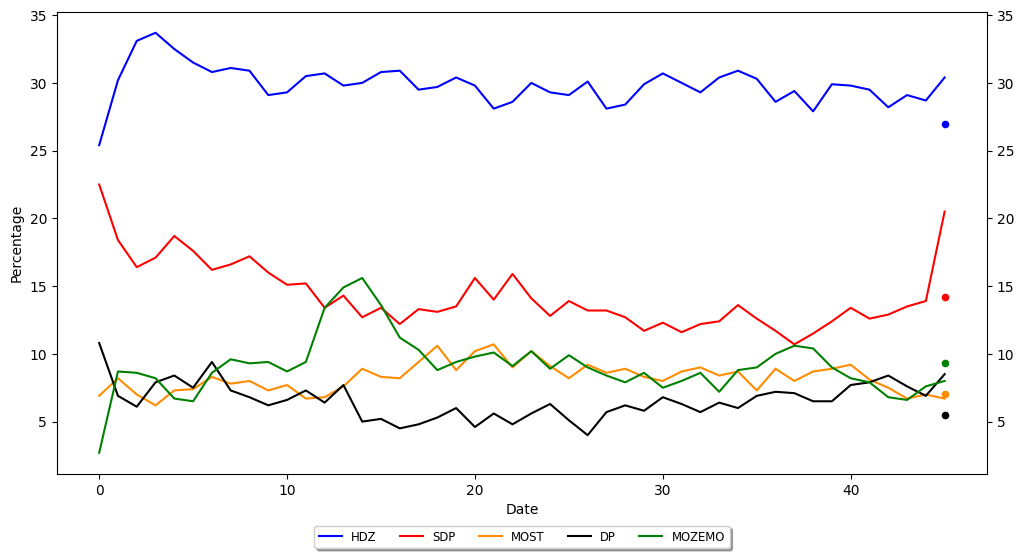

In [21]:
parties = ["HDZ", "SDP", "MOST", "DP", "MOZEMO"]

plt.figure(figsize=(12, 6))

# Plot the actual values for each column in parties
plt.plot(mdata.index, mdata['HDZ'], label=f'HDZ', color='blue')
plt.plot(mdata.index, mdata['SDP'], label=f'SDP', color='red')
plt.plot(mdata.index, mdata['MOST'], label=f'MOST', color='darkorange')
plt.plot(mdata.index, mdata['DP'], label=f'DP', color='black')
plt.plot(mdata.index, mdata['MOZEMO'], label=f'MOZEMO', color='green')


# Plot the predicted values for each column in parties as a single dot for each party
plt.scatter(df_forecast.index, df_forecast['HDZforecast'], color='blue', s=20)
plt.scatter(df_forecast.index, df_forecast['SDPforecast'], color='red', s=20)
plt.scatter(df_forecast.index, df_forecast['MOSTforecast'], color='darkorange', s=20)
plt.scatter(df_forecast.index, df_forecast['DPforecast'], color='black', s=20)
plt.scatter(df_forecast.index, df_forecast['MOZEMOforecast'], color='green', s=20)

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Percentage')

# Add a legend below the plot, all in one row, with thick lines
plt.legend(loc='upper center', ncol=5, fancybox=True, shadow=True, bbox_to_anchor=(0.5, -0.1), fontsize='small')

# add y labels on both sides
plt.tick_params(axis='y', which='both', labelleft=True, labelright=True)

# add y ticks on the right side
plt.tick_params(axis='y', which='both', right=True)

# Show the plot
plt.show()
